In [17]:
import os
from PIL import Image
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler  # Add EarlyStopping import
import os
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
file_path = 'C:\\ESTERA\\CCT\\Banana'

In [6]:
training_folder_path = 'C:\\ESTERA\\CCT\\Banana\\Train'
validation_folder_path = 'C:\\ESTERA\\CCT\\Banana\\Validation'
test_folder_path = 'C:\\ESTERA\\CCT\\Banana\\Test'


In [7]:
def count_labels(file_path ):
    label_count = 0
    for _, dirs, _ in os.walk(file_path ):
        label_count += len(dirs)
        break
    return label_count

num_labels = count_labels(training_folder_path)
print(f"Number of labels (folders) in the training dataset: {num_labels}")

Number of labels (folders) in the training dataset: 4


In [8]:
# Get a list of all labels (subfolder names) within the training folder
labels = [label for label in os.listdir(training_folder_path) if os.path.isdir(os.path.join(training_folder_path, label))]

# Sort the labels alphabetically
sorted_labels = sorted(labels)

# Print the list of labels
print("Sorted Labels:")
for label in sorted_labels:
    print(label)

Sorted Labels:
Good
Green
Mid
Over


In [9]:
# Image size and batch size
img_width, img_height = 960, 536 
batch_size = 32

In [10]:
# Data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1.0 / 255)

In [11]:
# Load and preprocess the data
train_generator = train_datagen.flow_from_directory(
    training_folder_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_folder_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 191 images belonging to 4 classes.
Found 42 images belonging to 4 classes.


In [12]:
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(4, activation='softmax') 
])


In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# Training
#epochs = 20  

#model.fit(
#    train_generator,
#    steps_per_epoch=len(train_generator),
#    epochs=epochs,
#    validation_data=validation_generator,
#    validation_steps=len(validation_generator)
#)


Epoch 1/20
6/6 [==============================] - 237s 38s/step - loss: 61.6113 - accuracy: 0.3560 - val_loss: 3.2710 - val_accuracy: 0.1429
Epoch 2/20
6/6 [==============================] - 268s 43s/step - loss: 3.0535 - accuracy: 0.3403 - val_loss: 1.4249 - val_accuracy: 0.3810
Epoch 3/20
6/6 [==============================] - 270s 41s/step - loss: 1.3442 - accuracy: 0.4398 - val_loss: 1.1537 - val_accuracy: 0.4048
Epoch 4/20
6/6 [==============================] - 241s 38s/step - loss: 1.0944 - accuracy: 0.4974 - val_loss: 0.9541 - val_accuracy: 0.5714
Epoch 5/20
6/6 [==============================] - 232s 38s/step - loss: 0.9386 - accuracy: 0.6702 - val_loss: 0.7651 - val_accuracy: 0.6905
Epoch 6/20
6/6 [==============================] - 215s 34s/step - loss: 0.7811 - accuracy: 0.7173 - val_loss: 1.2505 - val_accuracy: 0.3810
Epoch 7/20
6/6 [==============================] - 221s 37s/step - loss: 0.9661 - accuracy: 0.6230 - val_loss: 0.8936 - val_accuracy: 0.6905
Epoch 8/20
6/6 [===

In [28]:
# Initialize empty lists to store training and validation results
train_loss = []
train_accuracy = []
val_loss = []
val_accuracy = []

# Training
epochs = 20

for epoch in range(epochs):
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=1,
        validation_data=validation_generator,
        validation_steps=len(validation_generator)
    )
    
    # Append training and validation data to respective lists
    train_loss.append(history.history['loss'][0])
    train_accuracy.append(history.history['accuracy'][0])
    val_loss.append(history.history['val_loss'][0])
    val_accuracy.append(history.history['val_accuracy'][0])

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Epoch': range(1, epochs+1),
    'Train Loss': train_loss,
    'Train Accuracy': train_accuracy,
    'Validation Loss': val_loss,
    'Validation Accuracy': val_accuracy
})


6/6 [==============================] - 308s 51s/step - loss: 0.2390 - accuracy: 0.8691 - val_loss: 0.2559 - val_accuracy: 0.9048


In [33]:
results_df.head(25)

,Epoch,Train Loss,Train Accuracy,Validation Loss,Validation Accuracy
0,1,0.226344,0.900524,0.115082,0.928571
1,2,0.290511,0.895288,0.107473,0.952381
2,3,0.227715,0.916230,0.167095,0.928571
3,4,0.281497,0.879581,0.165710,0.952381
4,5,0.272453,0.869110,0.147986,0.928571
5,6,0.225419,0.884817,0.112034,0.952381
6,7,0.248039,0.879581,0.111999,0.952381
7,8,0.233127,0.905759,0.113107,0.952381
8,9,0.274998,0.874346,0.176501,0.928571
9,10,0.298306,0.863874,0.167569,0.928571


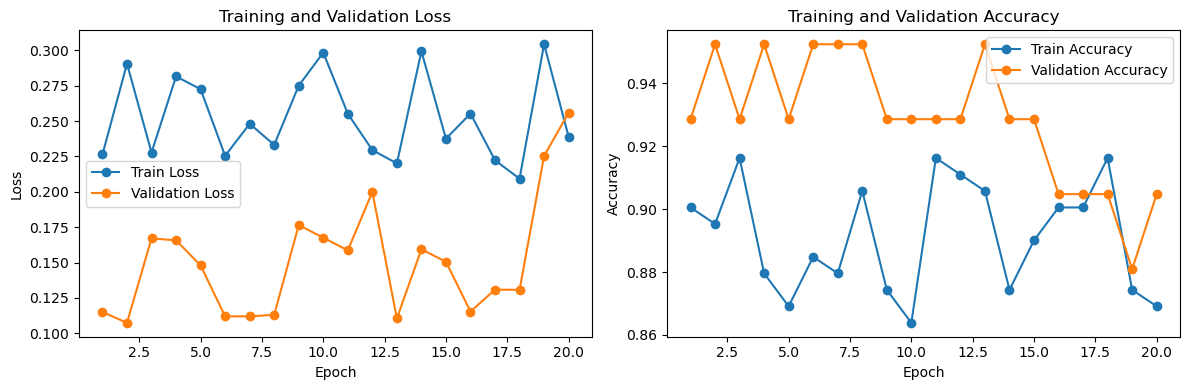

In [32]:
# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(results_df['Epoch'], results_df['Train Loss'], label='Train Loss', marker='o')
plt.plot(results_df['Epoch'], results_df['Validation Loss'], label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(results_df['Epoch'], results_df['Train Accuracy'], label='Train Accuracy', marker='o')
plt.plot(results_df['Epoch'], results_df['Validation Accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/20
6/6 [==============================] - 283s 43s/step - loss: 0.2664 - accuracy: 0.8796 - val_loss: 0.1849 - val_accuracy: 0.9048
Epoch 2/20
6/6 [==============================] - 341s 50s/step - loss: 0.2633 - accuracy: 0.8901 - val_loss: 0.1150 - val_accuracy: 0.9524
Epoch 3/20
6/6 [==============================] - 335s 53s/step - loss: 0.2242 - accuracy: 0.8953 - val_loss: 0.1153 - val_accuracy: 0.9524
Epoch 4/20
6/6 [==============================] - 296s 46s/step - loss: 0.2678 - accuracy: 0.8901 - val_loss: 0.1435 - val_accuracy: 0.9762
Epoch 5/20
6/6 [==============================] - 263s 42s/step - loss: 0.2699 - accuracy: 0.8796 - val_loss: 0.1089 - val_accuracy: 0.9524
Epoch 6/20
6/6 [==============================] - 282s 45s/step - loss: 0.2318 - accuracy: 0.8796 - val_loss: 0.0951 - val_accuracy: 1.0000
Epoch 7/20
6/6 [==============================] - 281s 41s/step - loss: 0.2093 - accuracy: 0.9005 - val_loss: 0.1262 - val_accuracy: 0.9524
Epoch 8/20
6/6 [====

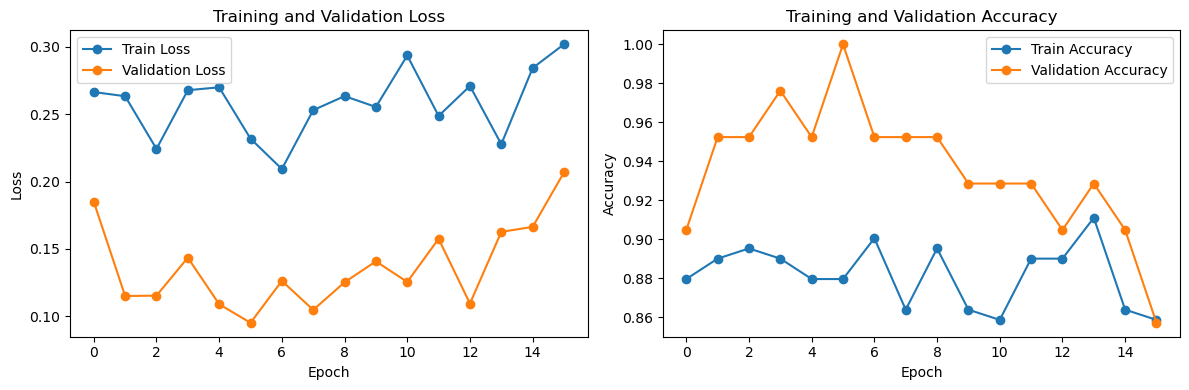

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback with increased patience
early_stopping = EarlyStopping(
    monitor='val_loss',    # Metric to monitor (validation loss)
    patience=10,           # Increase patience to allow more epochs
    restore_best_weights=True  # Restore the best model weights
)

# Training
epochs = 20 
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]
)

# Create a DataFrame to store the training history
df_stop = pd.DataFrame(history.history)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(df_stop['loss'], label='Train Loss', marker='o')
plt.plot(df_stop['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(df_stop['accuracy'], label='Train Accuracy', marker='o')
plt.plot(df_stop['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
df_stop.head(25)

,loss,accuracy,val_loss,val_accuracy
0,0.266395,0.879581,0.184930,0.904762
1,0.263322,0.890052,0.115009,0.952381
2,0.224193,0.895288,0.115276,0.952381
3,0.267788,0.890052,0.143478,0.976190
4,0.269905,0.879581,0.108921,0.952381
5,0.231819,0.879581,0.095126,1.000000
6,0.209266,0.900524,0.126245,0.952381
7,0.252973,0.863874,0.104691,0.952381
8,0.263384,0.895288,0.125210,0.952381
9,0.255344,0.863874,0.140745,0.928571


In [14]:

# Define the CNN model with dropout
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Add dropout here
    
    layers.Dense(num_labels, activation='softmax')  # Output layer with num_labels classes
])


In [15]:

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',    # Metric to monitor (validation loss)
    patience=10,           # Increase patience to allow more epochs
    restore_best_weights=True  # Restore the best model weights
)

In [19]:
# Define a learning rate schedule function
def learning_rate_schedule(epoch):
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1  # Reduce learning rate by a factor of 10 after 10 epochs


In [20]:
# Create a LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(learning_rate_schedule)

In [21]:

# Training
epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping, lr_scheduler]  # Include the lr_scheduler callback
)

# Create a DataFrame to store the training history
df_stop = pd.DataFrame(history.history)

Epoch 1/20
6/6 [==============================] - 360s 57s/step - loss: 21.1906 - accuracy: 0.2932 - val_loss: 1.0828 - val_accuracy: 0.5238 - lr: 0.0010
Epoch 2/20
6/6 [==============================] - 336s 48s/step - loss: 1.1773 - accuracy: 0.4974 - val_loss: 0.8057 - val_accuracy: 0.5238 - lr: 0.0010
Epoch 3/20
6/6 [==============================] - 341s 53s/step - loss: 0.7528 - accuracy: 0.6702 - val_loss: 0.5611 - val_accuracy: 0.7381 - lr: 0.0010
Epoch 4/20
6/6 [==============================] - 344s 54s/step - loss: 0.6269 - accuracy: 0.7435 - val_loss: 0.4205 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 5/20
6/6 [==============================] - 297s 46s/step - loss: 0.8077 - accuracy: 0.6702 - val_loss: 0.8398 - val_accuracy: 0.6429 - lr: 0.0010
Epoch 6/20
6/6 [==============================] - 312s 52s/step - loss: 0.7417 - accuracy: 0.7225 - val_loss: 0.5023 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 7/20
6/6 [==============================] - 285s 47s/step - loss: 0.5644 - 

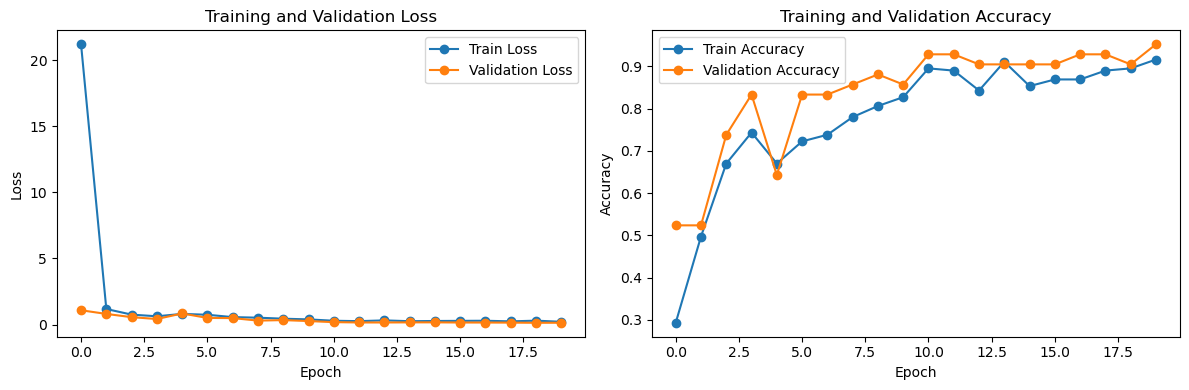

In [22]:
# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(df_stop['loss'], label='Train Loss', marker='o')
plt.plot(df_stop['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(df_stop['accuracy'], label='Train Accuracy', marker='o')
plt.plot(df_stop['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
# Evaluate the model on the test data
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_folder_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Found 40 images belonging to 4 classes.
2/2 [==============================] - 8s 785ms/step - loss: 0.2775 - accuracy: 0.8750
Test Accuracy: 87.50%


In [ ]:
# Save the model for future use
# model.save('banana_classifier_model.h5')

In [23]:
# Review the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 958, 534, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 479, 267, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 477, 265, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 238, 132, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 236, 130, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 118, 65, 128)      0